In [15]:
import os

import pandas as pd
import matplotlib.pylab as plt
import pylab as mpl  #导入中文字体，避免显示乱码
import matplotlib.dates as mdate
import numpy as np
mpl.rcParams['font.sans-serif']=['SimHei']  #设置为黑体字

In [16]:
doc_path='./data'
confimed_path=doc_path+'/confimed.csv'
cure_path=doc_path+'/cure.csv'
died_path=doc_path+'/died.csv'

missing_values = ["n/a", "na", "--"]

confime=pd.read_csv(confimed_path)
died=pd.read_csv(died_path)
cure=pd.read_csv(cure_path)

In [17]:
confime.index.size
confime.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/2/22', '6/3/22', '6/4/22', 'ISO 3166-1 Alpha 3-Codes', 'Region Code',
       'Region Name', 'Sub-region Code', 'Sub-region Name',
       'Intermediate Region Code', 'Intermediate Region Name'],
      dtype='object', length=876)

In [18]:
def get_city_case(city,province,model,confime):
    #China France Germany,Korea, North
    confime=confime[confime['Country/Region']==city]
    confime_total=confime[confime['Province/State']==province]
#     confime_total=confime
    if model=='confime'or model=='died':
        clip=-7
    elif model=='cure':
        clip=-311
    columns=confime_total.columns[4:clip].values
    loc=confime_total.loc[:,columns].sum()
    year_mouth=np.zeros((columns.size))
    day=np.zeros((columns.size))
    column=np.zeros((columns.size))

    for index,i in enumerate(columns):
        b=columns[index].split(r'/')
        if len(b[0])==1:
            year_mouth[index]='20'+b[2]+'0'+b[0]
        else:
             year_mouth[index]='20'+b[2]+b[0]
        day[index]=b[1]
    confime_sum=pd.DataFrame([loc.values,year_mouth,day],index=['People','Year_Mouth','Day'])
    confime_sum=pd.DataFrame(confime_sum.values.T,index=confime_sum.columns,columns=confime_sum.index)
    china_dict=confime_sum.groupby('Year_Mouth')
    y_value=china_dict.agg(np.mean)["People"].values
    return y_value,confime_sum


In [19]:
city='China'
province='Yunnan'
model='confime'
y_value,confime_sum=get_city_case(city,province,model,confime)

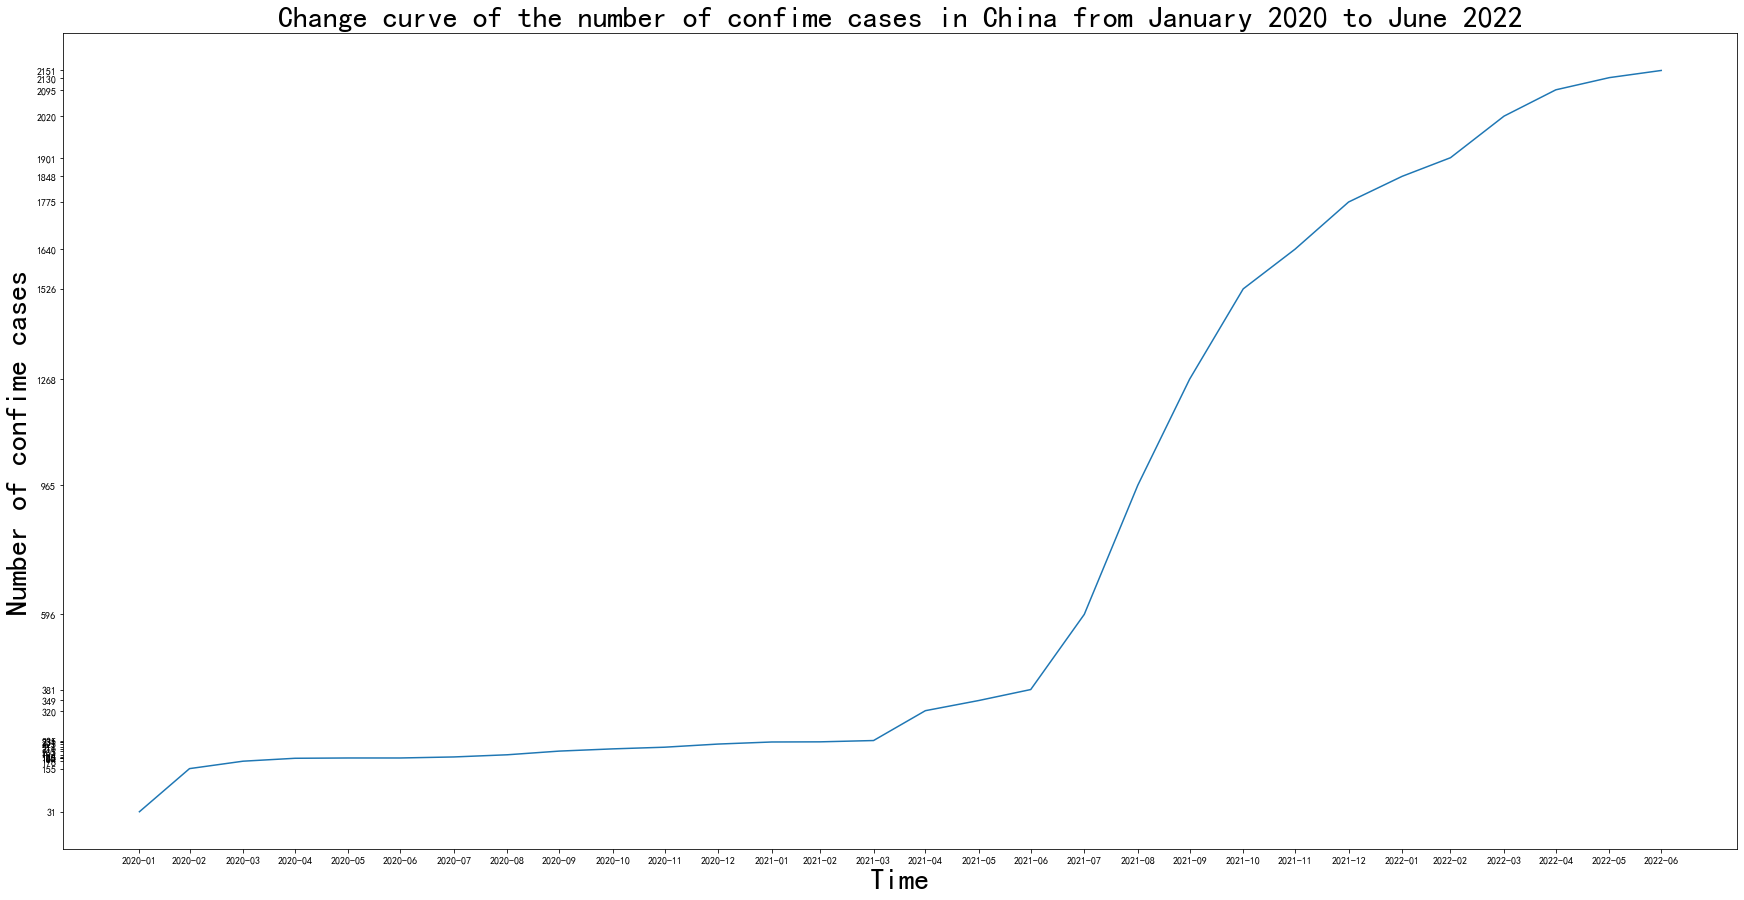

In [20]:
# china_dict=confime_sum.groupby('Year_Mouth')
# # print('china_dict',china_dict)
# y_value=china_dict.agg(np.mean)["People"].values
# print(y_value)

# ax = plt.gca()   #表明设置图片的各个轴，plt.gcf()表示图片本身
plt.figure(figsize=(30,15))
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
# ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%M'))  # 横坐标标签显示的日期格式
if model=='confime'or model=='died':
    time=pd.date_range(start='2020-1',end='2022-7',freq='M')
    plt.title(f"Change curve of the number of {model} cases in {city} from January 2020 to June 2022",fontsize=30)
elif model=='cure':
    time=pd.date_range(start='2020-1',end='2021-9',freq='M')
    plt.title(f"Change curve of the number of {model} cases in {city} from January 2020 to September 2021",fontsize=30)
plt.xticks(time) #横坐标日期范围及间隔
plt.yticks(y_value)  #设置纵坐标，使用range()函数设置起始、结束范围及间隔步长

plt.xlabel("Time",fontsize=30)#x轴上的名字
plt.ylabel(f"Number of {model} cases",fontsize=30)#y轴上的名字

plt.plot(time,y_value)

min_num=y_value.min()
max_num=y_value.max()
# ax = plt.gca()
# ax.set_ylim(0,5)
# ax.set_ylim(min_num,max_num)
# plt.ylim((min_num-1000000, max_num))

save_path=f'./img/{model}/'+city+f'_{model}.png'
plt.savefig(save_path)
plt.show()


In [21]:
# df1=pd.DataFrame(y_value,columns=['累计确诊'])
# 疫情高峰时期
df1=confime_sum
a = (df1['People'] - df1.shift(1)['People']).iloc[1:].tolist()
df1.iloc[a.index(max((df1['People'] - df1.shift(1)['People']).iloc[1:]))]

People           599.0
Year_Mouth    202107.0
Day               18.0
Name: 543, dtype: float64

In [22]:
confime_china,_=get_city_case(city,province,'cure',confime)
model='confime'# died ,cure
died_china,_=get_city_case(city,province,'cure',died)
cure_china,_=get_city_case(city,province,'cure',cure)

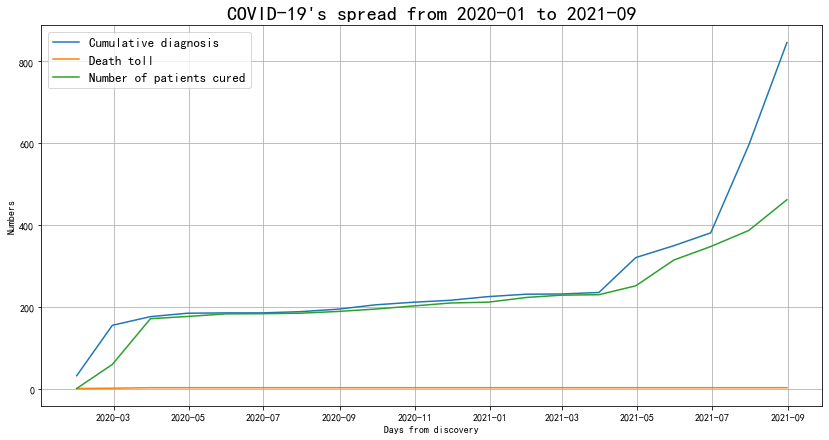

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))
time=pd.date_range(start='2020-1',end='2021-9',freq='M')
ax.plot(time, confime_china, label='Cumulative diagnosis')
ax.plot(time, died_china, label='Death toll')
ax.plot(time, cure_china, label='Number of patients cured')
ax.set_xlabel('Days from discovery')
ax.set_ylabel('Numbers')
ax.legend(fontsize=13)
ax.set_title("COVID-19's spread from 2020-01 to 2021-09",fontsize=20)
ax.grid(True)
plt.savefig(f'./img/Q1/trend/{city}_{province}_trend')
plt.show()

In [24]:
died_ratio=[i/j for i,j in zip(died_china,confime_china)]
cure_ratio=[i/j for i,j in zip(cure_china,confime_china)]

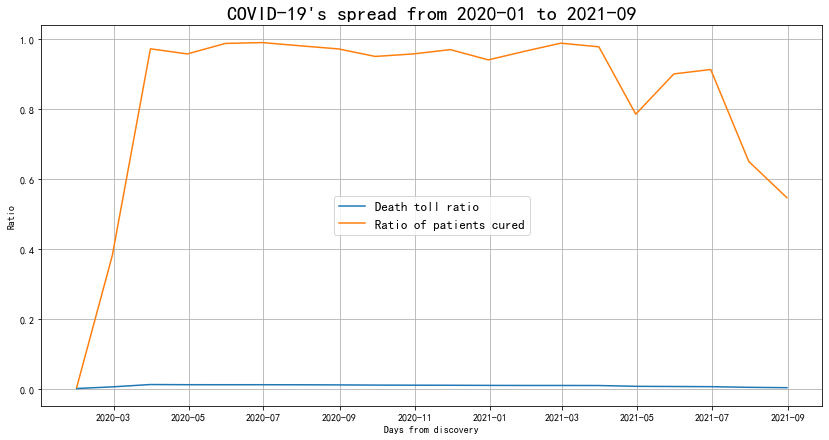

In [25]:
fig, ax = plt.subplots(figsize=(14, 7))
time=pd.date_range(start='2020-1',end='2021-9',freq='M')
ax.plot(time, died_ratio, label='Death toll ratio')
ax.plot(time, cure_ratio, label='Ratio of patients cured')
ax.set_xlabel('Days from discovery')
ax.set_ylabel('Ratio')
ax.legend(fontsize=13)
ax.set_title("COVID-19's spread from 2020-01 to 2021-09",fontsize=20)
ax.grid(True)
plt.savefig(f'./img/Q1/ratio/{city}_{province}_trend')
plt.show()

In [26]:
def country_case(city,model,confime):
    #China France Germany,Korea, North
    confime_total=confime[confime['Country/Region']==city]
    # confime_total=confime
    if model=='confime'or model=='died':
        clip=-7
    elif model=='cure':
        clip=-311
    columns=confime_total.columns[4:clip].values
    loc=confime_total.loc[:,columns].sum()
    year_mouth=np.zeros((columns.size))
    day=np.zeros((columns.size))
    column=np.zeros((columns.size))

    for index,i in enumerate(columns):
        b=columns[index].split(r'/')
        if len(b[0])==1:
            year_mouth[index]='20'+b[2]+'0'+b[0]
        else:
             year_mouth[index]='20'+b[2]+b[0]
        day[index]=b[1]
    confime_sum=pd.DataFrame([loc.values,year_mouth,day],index=['People','Year_Mouth','Day'])
    confime_sum=pd.DataFrame(confime_sum.values.T,index=confime_sum.columns,columns=confime_sum.index)
    china_dict=confime_sum.groupby('Year_Mouth')
    y_value=china_dict.agg(np.mean)["People"].values
    return y_value,confime_sum

In [27]:
city='China'
confime_china,_=country_case(city,'cure',confime)
model='confime'# died ,cure
died_china,_=country_case(city,'cure',died)
cure_chia,_=country_case(city,'cure',cure)
print(len(confime_china),len(died_china),len(cure_chia))

20 20 20


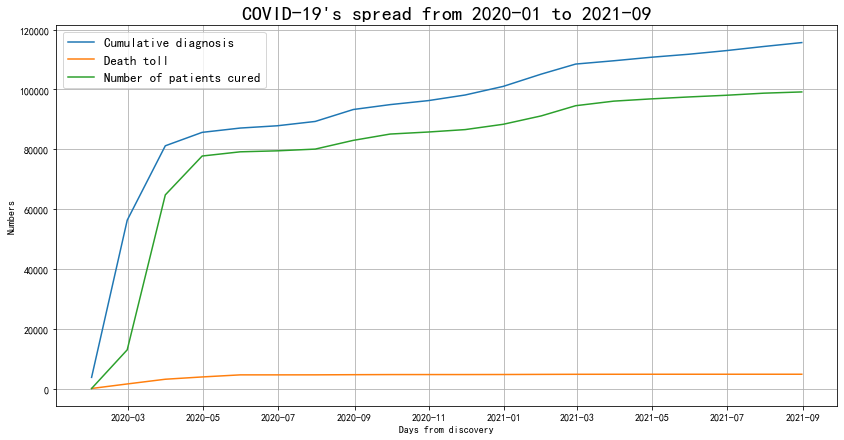

In [29]:
fig, ax = plt.subplots(figsize=(14, 7))
time=pd.date_range(start='2020-1',end='2021-9',freq='M')
ax.plot(time, confime_china, label='Cumulative diagnosis')
ax.plot(time, died_china, label='Death toll')
ax.plot(time, cure_chia, label='Number of patients cured')
ax.set_xlabel('Days from discovery')
ax.set_ylabel('Numbers')
ax.legend(fontsize=13)
ax.set_title("COVID-19's spread from 2020-01 to 2021-09",fontsize=20)
ax.grid(True)
plt.savefig('./img/中国变化趋势')
plt.show()